# Customer Segmenation

<h2> Covered

- Unsupervised Learing
- KMeans Clustering Method
- Elbow Points Calculation
- Model Validation

# Import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
np.random.seed(42)

# Load Data

In [2]:
data = pd.read_csv('Mall_Customers.csv', index_col='CustomerID')
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


# EDA

In [3]:
df = data.copy()

In [4]:
df.info() # no missing value found, but there is a object/texual data type need to change the type

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


## Type Correction || object type to categorical

In [5]:
df.Gender.astype('category').cat.codes

CustomerID
1      1
2      1
3      0
4      0
5      0
      ..
196    0
197    0
198    1
199    1
200    1
Length: 200, dtype: int8

In [6]:
from sklearn.preprocessing import LabelEncoder

In [7]:
encoder = LabelEncoder()

In [8]:
df.Gender = encoder.fit_transform(df.Gender)

In [9]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,1,19,15,39
2,1,21,15,81
3,0,20,16,6
4,0,23,16,77
5,0,31,17,40


In [10]:
gender = df.Gender.value_counts()
gender.values

array([112,  88], dtype=int64)

<AxesSubplot:>

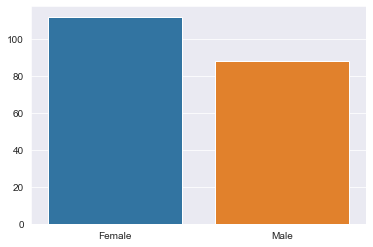

In [11]:
sns.set_style('darkgrid')
sns.barplot(x=["Female","Male"], y=gender.values)
# sns.barplot(x=encoder.inverse_transform(gender.index), y=gender.values)  # Assiging auto x value, alternaive approach

In [12]:
df.Gender.values

array([1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1])

In [13]:
encoder.inverse_transform(df.Gender.values)

array(['Male', 'Male', 'Female', 'Female', 'Female', 'Female', 'Female',
       'Female', 'Male', 'Female', 'Male', 'Female', 'Female', 'Female',
       'Male', 'Male', 'Female', 'Male', 'Male', 'Female', 'Male', 'Male',
       'Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female',
       'Female', 'Male', 'Female', 'Male', 'Male', 'Female', 'Female',
       'Female', 'Female', 'Female', 'Female', 'Female', 'Male', 'Male',
       'Female', 'Female', 'Female', 'Female', 'Female', 'Female',
       'Female', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male',
       'Female', 'Male', 'Female', 'Male', 'Male', 'Male', 'Female',
       'Female', 'Male', 'Male', 'Female', 'Female', 'Male', 'Female',
       'Male', 'Female', 'Female', 'Female', 'Male', 'Male', 'Female',
       'Male', 'Female', 'Female', 'Male', 'Male', 'Male', 'Female',
       'Female', 'Male', 'Female', 'Female', 'Female', 'Female', 'Female',
       'Male', 'Male', 'Female', 'Female', 'Male', 'Female', 'Female',


# Inspecting Other Features

<AxesSubplot:xlabel='Age', ylabel='Count'>

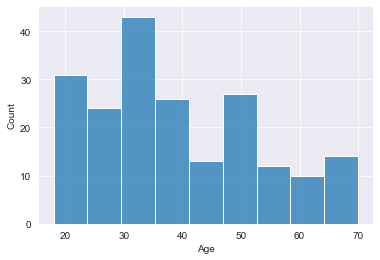

In [14]:
# Inspecting Age
sns.histplot(data=df, x="Age")
# see most of the people around 20-30, more involved with shopping

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Count'>

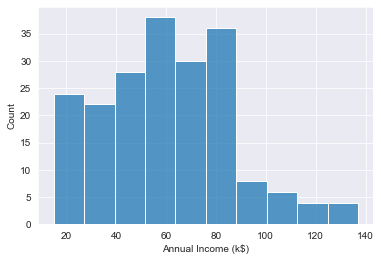

In [15]:
# Inspecting - Annual Income
sns.histplot(data=df, x="Annual Income (k$)")

<AxesSubplot:xlabel='Spending Score (1-100)', ylabel='Count'>

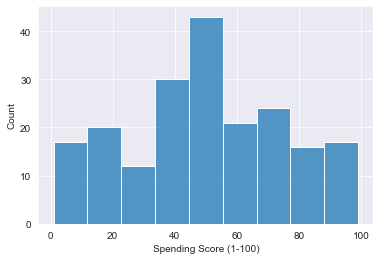

In [16]:
# Verify Spending Score
sns.histplot(data=df, x='Spending Score (1-100)')

### See the relationship between all

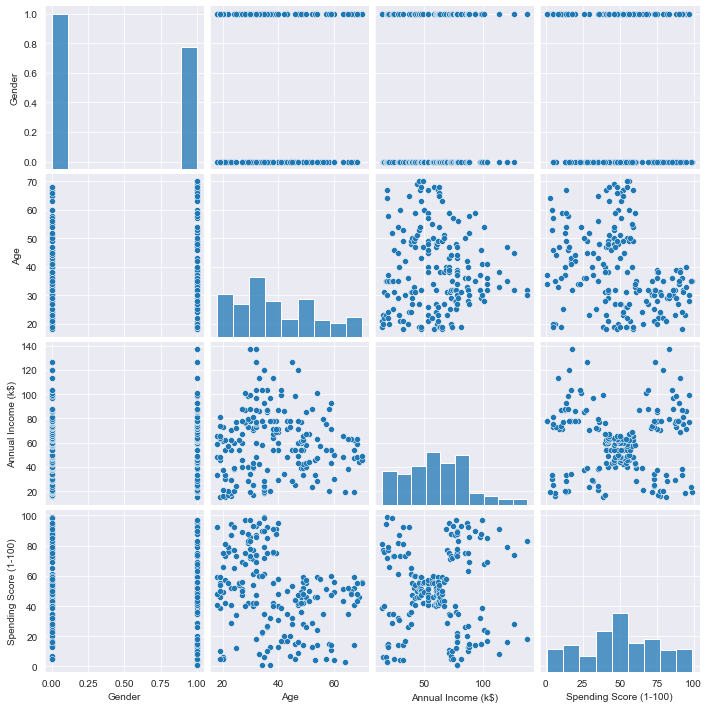

In [17]:
sns.pairplot(data = df)

# Scaling

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
scaler = StandardScaler()
scaled = scaler.fit_transform(df.drop(columns=['Gender',]))
scaled
# 4 featured scaled, but no need to scaled for "Categorical data" that why gender dropped

array([[-1.42456879, -1.73899919, -0.43480148],
       [-1.28103541, -1.73899919,  1.19570407],
       [-1.3528021 , -1.70082976, -1.71591298],
       [-1.13750203, -1.70082976,  1.04041783],
       [-0.56336851, -1.66266033, -0.39597992],
       [-1.20926872, -1.66266033,  1.00159627],
       [-0.27630176, -1.62449091, -1.71591298],
       [-1.13750203, -1.62449091,  1.70038436],
       [ 1.80493225, -1.58632148, -1.83237767],
       [-0.6351352 , -1.58632148,  0.84631002],
       [ 2.02023231, -1.58632148, -1.4053405 ],
       [-0.27630176, -1.58632148,  1.89449216],
       [ 1.37433211, -1.54815205, -1.36651894],
       [-1.06573534, -1.54815205,  1.04041783],
       [-0.13276838, -1.54815205, -1.44416206],
       [-1.20926872, -1.54815205,  1.11806095],
       [-0.27630176, -1.50998262, -0.59008772],
       [-1.3528021 , -1.50998262,  0.61338066],
       [ 0.94373197, -1.43364376, -0.82301709],
       [-0.27630176, -1.43364376,  1.8556706 ],
       [-0.27630176, -1.39547433, -0.590

In [20]:
df.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

In [21]:
df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']] = scaled

In [22]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,1,-1.424569,-1.738999,-0.434801
2,1,-1.281035,-1.738999,1.195704
3,0,-1.352802,-1.700830,-1.715913
4,0,-1.137502,-1.700830,1.040418
5,0,-0.563369,-1.662660,-0.395980


# KMeans Clustering / Modeling

##### KMeans Clustering Method

In [23]:
from sklearn.cluster import KMeans

In [24]:
cluster = KMeans()
cluster.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']]) # My model is ready now

KMeans()

### Model inspection

In [25]:
cluster.cluster_centers_
# Get the 2D array because of annual income & spending score, 8 values because of default k=8

array([[-1.35185213, -1.19089759],
       [ 0.03367718, -0.08242116],
       [ 0.75632724,  1.27092084],
       [-1.35921337,  1.19570407],
       [ 0.73088095, -1.39401754],
       [ 1.87564575, -1.09476801],
       [-0.62198207,  0.04247535],
       [ 2.06703817,  1.0958772 ]])

In [26]:
cluster.n_clusters, cluster.inertia_

(8, 37.73640346254161)

## Finding K with Elbow Method

- How can we confirm/validate this above default K=8 is best cluster and 37.73640346254161 this is minimum error
- Defining n_cluster/ k from (2-10) one by one and will try to find out elbow point

In [27]:
inertia = np.array([[0,0]])
for k in range(2,11):
    kcluster = KMeans(n_clusters=k)
    kcluster.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']])
    inertia = np.append(inertia,[[k, kcluster.inertia_]], axis=0)

In [28]:
inertia

array([[  0.        ,   0.        ],
       [  2.        , 269.01679375],
       [  3.        , 157.70400815],
       [  4.        , 108.92131661],
       [  5.        ,  65.56840816],
       [  6.        ,  55.05734827],
       [  7.        ,  44.91118555],
       [  8.        ,  37.18028799],
       [  9.        ,  32.37724377],
       [ 10.        ,  29.061153  ]])

<AxesSubplot:>

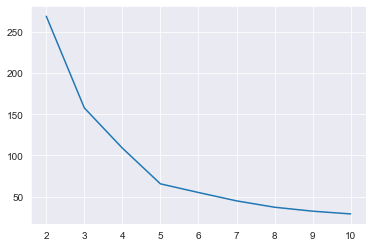

In [29]:
sns.lineplot(x=inertia[1:,0], y=inertia[1:,1])

# Visualizing Clusters

In [30]:
cluster = KMeans(n_clusters=5)
cluster.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']])

KMeans(n_clusters=5)

In [31]:
cluster.predict(df[['Annual Income (k$)', 'Spending Score (1-100)']])

array([3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 1,
       3, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 2, 4, 1, 4, 2, 4, 2, 4,
       1, 4, 2, 4, 2, 4, 2, 4, 2, 4, 1, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4])

In [34]:
data['Cluster'] = cluster.predict(df[['Annual Income (k$)', 'Spending Score (1-100)']])

In [35]:
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
CustomerID,,,,,
1,Male,19,15,39,3
2,Male,21,15,81,0
3,Female,20,16,6,3
4,Female,23,16,77,0
5,Female,31,17,40,3


<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

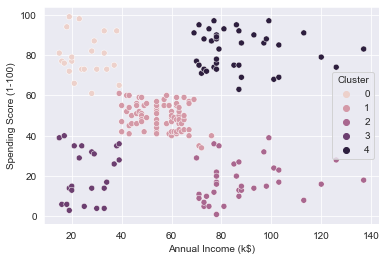

In [37]:
sns.scatterplot(data=data, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster')

## Validation

In [40]:
from sklearn.metrics import silhouette_score

In [39]:
silhouette_score(df[['Annual Income (k$)', 'Spending Score (1-100)']], df['Cluster'])

0.5546571631111091